<a href="https://colab.research.google.com/github/ferreirabruno7/Text_analyze/blob/master/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Contexto e Problemtização ***

O seguinte projeto busca identificar quais os principais temas de discussão no twitter com foco no Distrito Federal. 

Foram coletados tweets com durante o ano de 2021 com hashtags #bddf, #df1, #df2 e menções ao termo "Ibaneis"

A escolha das  hashtags foi baseada na representatividade da interações com foco em pautas regionais. 

Os tweets foram coletado entre 01/01/2021 a 14/08/2021 com a biblioteca twiint

In [1]:
!pip install pyLDAvis

In [2]:
!pip install pandas --upgrade


In [3]:
#load libraries 
import nltk
import urllib
import bs4 as bs
import re
from gensim.models import Word2Vec
from nltk.corpus import brown
import pandas as pd
import gensim
import spacy
from tqdm import tqdm

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('webtext')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


True

In [5]:
#acessar google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
#tweets do coletado com a hashtag 
text = pd.read_csv("/content/drive/My Drive/Colab Notebooks/omedena/chats_whatsapp.csv", delimiter = ',', encoding='utf-8')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
#junção de todos os dados em único dataframe
text.head()

,date,send,person,number,content
0,2020-06-03 19:03:34,1,Enrique,+573146423704,Puede enviarme la informacion
1,2020-06-03 19:03:38,1,Enrique,+573146423704,De su datos
2,2020-06-03 19:03:59,1,Enrique,+573146423704,Para hacerle el registro
3,2020-06-03 19:04:10,0,Enrique,+573146423704,Tulio Enrique parra Brito 19792795
4,2020-06-03 19:04:21,0,Enrique,+573146423704,3146423704


In [8]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [9]:
#transformar coluna em lista
col_one_list = text['content'].tolist()
texto = str(col_one_list)
texto

In [10]:
# conveter lista para texto
nltk.download('punkt')
texto = str(col_one_list)
type(texto)
moby_tokens = nltk.word_tokenize(texto)
text1 = nltk.Text(moby_tokens)
text1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Text: [ 'Puede enviarme la informacion ' , 'De...>

In [11]:
#total de termos no documento
from nltk.stem import WordNetLemmatizer

def total_termos():

    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(w,'v') for w in text1]

    return len(set(lemmatized))

total_termos()

78427

In [12]:
#importar bibliotecas trigram
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
from nltk.corpus import stopwords

In [13]:
#trigram tokens
procurar = TrigramCollocationFinder.from_words(moby_tokens)

In [14]:
#retira stopwords
retira = set(stopwords.words('spanish'))

In [15]:
filtra = lambda w: len(w) <3 or w in retira

In [16]:
procurar.apply_word_filter(filtra)


In [17]:
#trigrams
procurar.nbest(TrigramAssocMeasures.likelihood_ratio, 100)


[('mas', 'pronto', 'posible'),
 ('obtener', 'actualizaciones', 'importantes'),
 ('🤝Ayuda', 'Humanitaria', '\\r\\n4'),
 ('Retorno', 'Voluntario', '\\r\\n2'),
 ('mas', 'pronto', 'posible🏃🏽'),
 ('mas', 'pronto', 'posible🏃🏽.'),
 ('mas', 'pronto', 'posible.'),
 ('pronto', 'posible', 'gracias'),
 ("'Respuesta", 'pronto', 'posible'),
 ('pronto', 'posible', 'muchas'),
 ('mas', 'rapido', 'posible'),
 ('mas', 'rápido', 'posible'),
 ('mas', 'claros', 'posible'),
 ("'Hola", 'quiero', 'información'),
 ('obtener', 'actualizaciones', 'importantes.\\r\\n\\r\\n¿En'),
 ('cómo', 'puedo', 'ayudarte'),
 ("'Cómo", 'puedo', 'ayudarte'),
 ('puedo', 'ayudarte', 'puedo'),
 ("'no", 'puedo', 'ayudarte'),
 ('información', 'necesitas', 'saber'),
 ('requerimientos', 'puede', 'dejarnos'),
 ('Para', 'Migrantes', 'Venezolanos'),
 ('Migrantes', 'Venezolanos', 'radicados'),
 ('Protección', 'Para', 'Migrantes'),
 ('haría', 'Para', 'volver'),
 ('Migrantes', 'Venezolanos', 'siempre'),
 ('necesitas', 'saber', '👉https'),
 ('M

In [18]:
#termos frequentes com mais de 5 caracteres top 10
def termos_frequentes():
    dist = nltk.FreqDist(text1)
    vocab1 = dist.keys()
    freqwords = [w for w in vocab1 if len(w) > 3 and dist[w] > 2]
    return sorted(freqwords)

termos_frequentes()

["'*Ahora",
 "'*BONOS",
 "'*La",
 "'*RECIBE",
 "'*_✊",
 "'+57",
 "'+58",
 "'-Acude",
 "'-Ayuda",
 "'-Bancamía",
 "'-Centro",
 "'-Cómo",
 "'-Dudas",
 "'-Educación",
 "'-Línea",
 "'-Matrimonio",
 "'-Nacionalidad",
 "'-Qué",
 "'-Retorno",
 "'-Réfime",
 "'-Régimen",
 "'-SENA",
 "'-Salvoconducto",
 "'-Unión",
 "'-Validación",
 "'-Visas",
 "'-¿Cuáles",
 "'.Si",
 "'.\\r\\n",
 "'/D+",
 "'/DD",
 "'/Hola",
 "'/d+",
 "'/dd",
 "'/https",
 "'01-8000-113200",
 "'1.-",
 "'11/11/1985",
 "'123",
 "'180",
 "'2,3,4",
 "'2,3,5",
 "'2-5",
 "'2.-",
 "'2018",
 "'2018/08/05",
 "'2018/08/06",
 "'2018/08/09",
 "'2018/09/04",
 "'2020",
 "'28-12-2018",
 "'28/12/2018",
 "'29.08.2018",
 "'2y3",
 "'3,4,5",
 "'3.-",
 "'3.ayuda",
 "'3ayuda",
 "'3y5",
 "'4-5",
 "'5-7",
 "'5permiso",
 "'5y6",
 "'A-1",
 "'A1-",
 "'ACABO",
 "'ACTUALMENTE",
 "'ADEMAS",
 "'ADICIONAL",
 "'AHORA",
 "'AHORITA",
 "'ALLI",
 "'AMBOS",
 "'AMEN",
 "'AMIGA",
 "'AMIGO",
 "'ANIMO",
 "'ANTES",
 "'APENAS",
 "'AQUI",
 "'ARRIBA",
 "'ASI",
 "'ATENTA",
 "'A

In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
print(stopwords.words('spanish'))


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [21]:
stop = stopwords.words('spanish')

In [22]:
print(stop)


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [23]:
def remove_stopword(word): 
    return word not in words

In [24]:
text['content'].str.lower().str.split() 

0                        [puede, enviarme, la, informacion]
1                                           [de, su, datos]
2                             [para, hacerle, el, registro]
3                  [tulio, enrique, parra, brito, 19792795]
4                                              [3146423704]
                                ...                        
412078                                                 [si]
412079     [muy, buenos, dias, cordial, saludos, pregunto?]
412080    [[emoji], hola,, me, llamo, ramona, y, soy, un...
412081                                                 [si]
412082    [buenos, dias, pregunto, tengo, dos, niños, y,...
Name: content, Length: 412083, dtype: object

In [25]:
text['content'] = text['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [26]:
text['content'] = text['content'].replace(to_replace=r'http\S+|www.\S+',value='',regex=True)

text['content'] = text['content'].replace(to_replace=r'^co?:\/\/.*[\r\n]*',value='',regex=True)




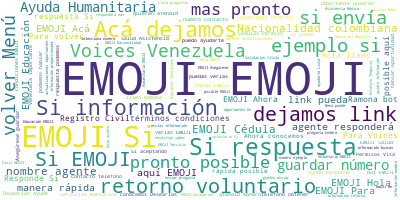

In [27]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(text['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [28]:
# Load the regular expression library
import re
# Remove punctuation
text['impacto_processed'] = text['content'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
text['impacto_processed'] = text['content'].map(lambda x: x.lower())
# Print out the first rows of papers
text['impacto_processed'].head()

0            puede enviarme informacion
1                              de datos
2                 para hacerle registro
3    tulio enrique parra brito 19792795
4                            3146423704
Name: impacto_processed, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


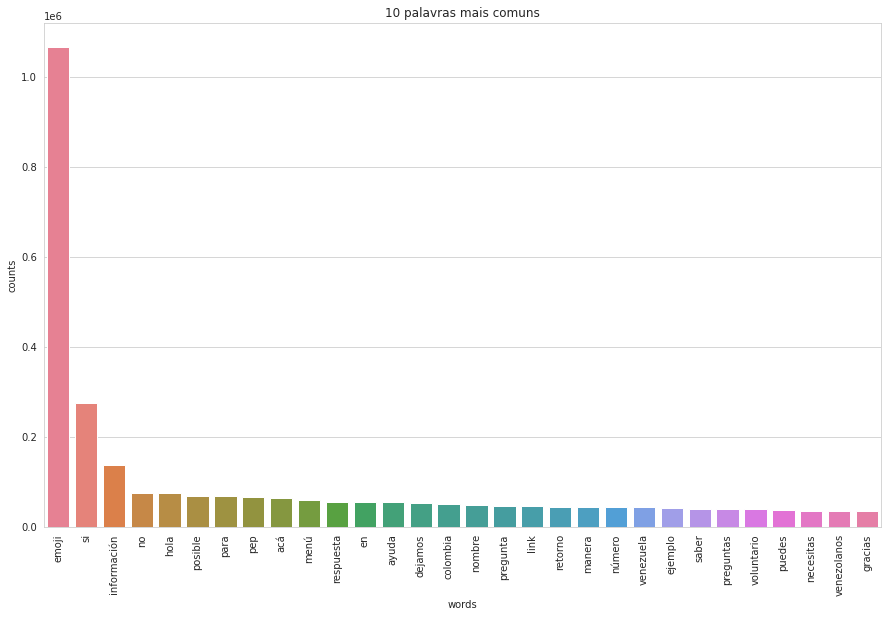

In [29]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(text['content'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [30]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 15
number_words = 50
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Tópicos via LDA:")
print_topics(lda, count_vectorizer, number_words)

Tópicos via LDA:

Topic #0:
emoji si pregunta proporcionada información puede dejamos ayudas embajada parte alguna responder menú censo link venezolana palabra estamos en vulnerabilidad pagina lunes inquietudes mensaje viernes humanitarias disponibles ayuda te directo cumple web luego nombre 8am contactarnos final 6pm dudes brevedad incluya dejarnos agente responderá logística búsqueda encargando inscribete gracias requerimientos

Topic #1:
buenas tardes quoted noches hola si c1 matrimonio pep para net whatsapp caso 54 debes hacer tarde c2 envía libre unión colombia volver sisben como poder migracion noche solicitar en puedes informacion salvoconducto tener you puede inquietud 01 hago document ayudar mas gratuita comunicarte 8000 nacional solo pregunta obtener orientarte

Topic #2:
hola información quiero nombre buen años día quisiera venezolana colombia ayuda aquí mi acá saber dos niños dia necesito cómo solo hijos soy hija madre venezuela favor puedo trabajo colombiano vivo cédula te

In [35]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os
pyLDAvis.enable_notebook()


  # load the pre-prepared pyLDAvis data from disk
  

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [36]:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
p = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.save_html(p, '/content/drive/My Drive/Colab Notebooks/tlda_chatbot.html')


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [31]:
#ajsutar dataframe
dfObj = [e for e in text['content'] if isinstance(e, str)]
dfObj = pd.DataFrame(dfObj)

In [32]:
#importa biblitotecas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer() # variar parametros (L1/L2, etc)
X = vectorizer.fit_transform(text['content'])
X = normalize(X)

In [33]:
kmeans = KMeans(
    n_clusters = 15, # variar
    n_init = 15, 
    max_iter = 450, 
    init = 'k-means++'
)

In [34]:
#treinar com kmeans

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=450,
       n_clusters=15, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
text['cluster'] = kmeans.labels_
text

,date,send,person,number,content,impacto_processed,cluster
0,2020-06-03 19:03:34,1,Enrique,+573146423704,Puede enviarme informacion,puede enviarme informacion,2
1,2020-06-03 19:03:38,1,Enrique,+573146423704,De datos,de datos,2
2,2020-06-03 19:03:59,1,Enrique,+573146423704,Para hacerle registro,para hacerle registro,2
3,2020-06-03 19:04:10,0,Enrique,+573146423704,Tulio Enrique parra Brito 19792795,tulio enrique parra brito 19792795,2
4,2020-06-03 19:04:21,0,Enrique,+573146423704,3146423704,3146423704,2
...,...,...,...,...,...,...,...
412078,2021-06-29 13:23:59,0,573107129280,573107129280,Si,si,5
412079,2021-06-29 13:32:15,0,573116498461,573116498461,Muy buenos dias cordial saludos pregunto?,muy buenos dias cordial saludos pregunto?,2
412080,2021-06-29 13:32:16,1,573116498461,573116498461,"[EMOJI] Hola, llamo Ramona bot🤖. [EMOJI]Para V...","[emoji] hola, llamo ramona bot🤖. [emoji]para v...",7
412081,2021-06-29 13:32:36,0,573116498461,573116498461,Si,si,5


In [36]:
text['cluster'].value_counts()

2     280957
7      24423
4      23640
5      16895
1      16355
10      8552
14      6755
13      6282
8       5734
6       5101
9       4217
0       4144
3       4136
11      2846
12      2046
Name: cluster, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print('silhueta media:', silhouette_avg)

silhueta media: 0.012883078890323309


In [71]:
# função para extrair tokens do tweet
def get_tokens(sentence):
    return [x.text for x in nlp_en(sentence)]

In [72]:
tqdm.pandas(desc="Progress")
!python3 -m spacy download en_core_web_sm
nlp_en = spacy.load("en_core_web_sm")

     |████████████████████████████████| 12.0 MB 4.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [73]:
text['content'] = text['content'].progress_apply(get_tokens)

Progress: 100%|██████████| 412083/412083 [1:34:39<00:00, 72.55it/s]


In [74]:
text.to_pickle("pd_data_tokenized.pickle")

In [75]:
model_w2v = gensim.models.Word2Vec(text['content'].tolist(), min_count=5, window = 9, size = 100)

In [76]:
model_ft = gensim.models.FastText(text['content'].tolist(), min_count=5, window = 9, size = 100)


In [77]:
model_w2v.save("model_w2v.model")
model_ft.save("model_ft.model")

In [78]:
model_w2v = gensim.models.Word2Vec.load("model_w2v.model")
model_ft = gensim.models.FastText.load("model_ft.model")

In [79]:
model_w2v.most_similar("pregunta", topn=10)

[('viernes', 0.3980292081832886),
 ('preguntica', 0.3647673428058624),
 ('QUOTED]573004893304@s.whatsapp.net', 0.31675198674201965),
 ('redacte', 0.3130657374858856),
 ('Pregunta', 0.31120961904525757),
 ('Pi', 0.2983616590499878),
 ('jinnay', 0.2957543134689331),
 ('preguntita', 0.28394222259521484),
 ('de', 0.2827111482620239),
 ('diganme', 0.27899402379989624)]

In [80]:
model_w2v.most_similar("información", topn=10)

[('Pueda', 0.38522255420684814),
 ('visjar', 0.37868553400039673),
 ('ESTUDIANTIL[/QUOTED', 0.3593299090862274),
 ('establecerme', 0.35395723581314087),
 ('[', 0.34622031450271606),
 ('CASO[/QUOTED', 0.3430212736129761),
 ('Sampayo', 0.3427332639694214),
 ('QUOTED]573015213661@s.whatsapp.net', 0.3414026200771332),
 ('esi', 0.33607208728790283),
 ('fase[/QUOTED', 0.3343048095703125)]

In [81]:
model_w2v.most_similar("requerimientos", topn=10)

[('gra', 0.2927345335483551),
 ('agentes', 0.28482162952423096),
 ('enviar', 0.27478092908859253),
 ('orientará', 0.2638489603996277),
 ('Rosmarys', 0.26152610778808594),
 ('jenny', 0.25339531898498535),
 ('gaspar', 0.25293290615081787),
 ('VocesMigrantes', 0.24704834818840027),
 ('kevin', 0.24526336789131165),
 ('tardanza,[EMOJI', 0.23983639478683472)]

In [82]:
model_w2v.most_similar("indígena", topn=10)

[('María', 0.5236499905586243),
 ('Iguarán', 0.4757767617702484),
 ('compartimos', 0.4671112298965454),
 ('CONTINUA', 0.43852388858795166),
 ('FALLAS', 0.4356057941913605),
 ('PRESENTANDO', 0.4296717643737793),
 ('DEBIDO', 0.39351212978363037),
 ('DESDE', 0.3803677558898926),
 ('like', 0.377278596162796),
 ('LABORALES', 0.3683134913444519)]

In [83]:
model_w2v.most_similar("voluntario", topn=10)

[('envías', 0.41058826446533203),
 ('enviar', 0.32413291931152344),
 ('buscas', 0.3116663098335266),
 ('verlo', 0.3032877445220947),
 ('ejemplo', 0.30074793100357056),
 ('llegases', 0.2785757780075073),
 ('señora', 0.2748539447784424),
 ('decisión', 0.27081894874572754),
 ('pereza', 0.2688862979412079),
 ('bancarias', 0.262615442276001)]

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

In [ ]:
%%time
model_w2v = gensim.models.Word2Vec(comentarios["tokens"].tolist(), min_count=250, window = 9, size = 100)

CPU times: user 1.39 s, sys: 38.5 ms, total: 1.43 s
Wall time: 928 ms


In [ ]:
tokens = []
labels = []

for x in model_w2v.wv.vocab:
    tokens.append(model_w2v[x])
    labels.append(x)
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packa

In [ ]:
%%time
tsne_model = TSNE(n_components=2, random_state=11)
fitted = tsne_model.fit_transform(tokens)

CPU times: user 2.08 s, sys: 7.27 ms, total: 2.08 s
Wall time: 1.08 s


In [39]:
text.to_csv('/content/drive/My Drive/Colab Notebooks/csv_chatbot.csv')


In [41]:
cluster0 = text[text['cluster']==0]
cluster1 = text[text['cluster']==1]
cluster2 = text[text['cluster']==2]
cluster3 = text[text['cluster']==3]
cluster4 = text[text['cluster']==4]
cluster5 = text[text['cluster']==5]
cluster6 = text[text['cluster']==6]
cluster7 = text[text['cluster']==7]
cluster8 = text[text['cluster']==8]
cluster9 = text[text['cluster']==9]
cluster10 = text[text['cluster']==10]
cluster11 = text[text['cluster']==11]
cluster12 = text[text['cluster']==12]
cluster13 = text[text['cluster']==13]
cluster14 = text[text['cluster']==14]

# **Cluster 0**

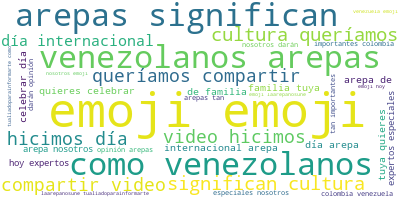

In [42]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster0['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


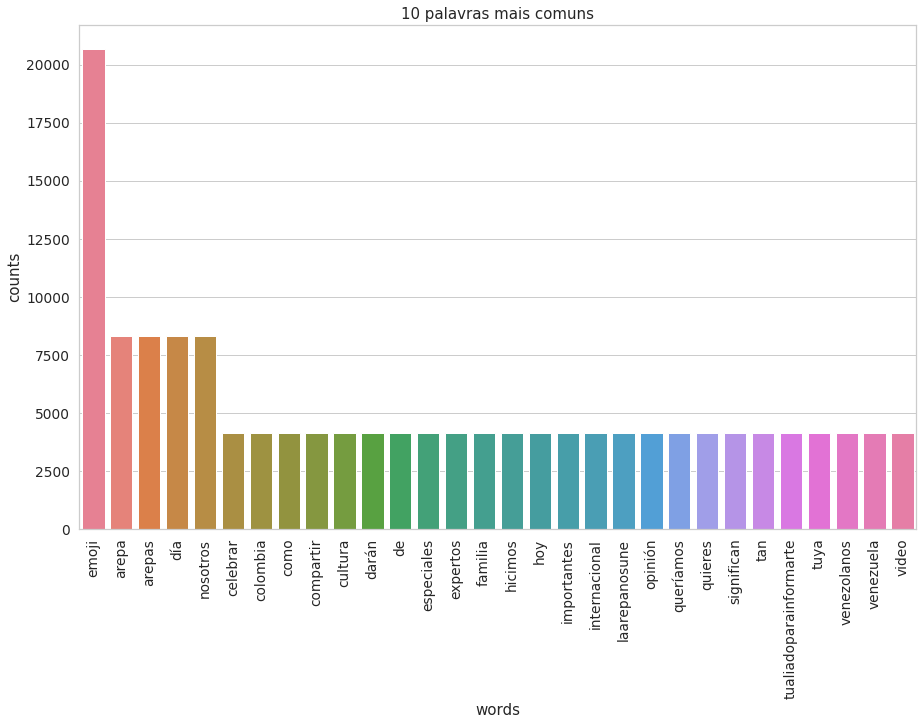

In [43]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster0['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## **Cluster 1**

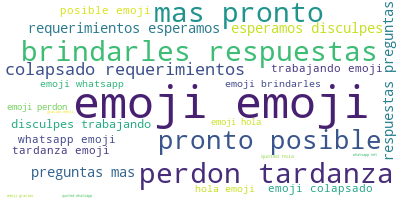

In [44]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster1['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


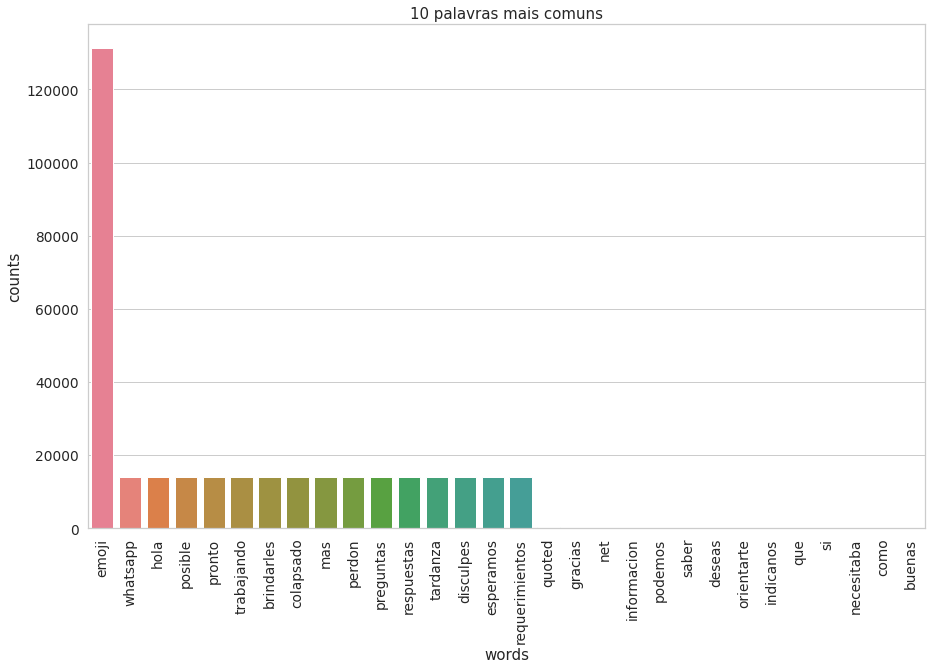

In [45]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster1['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## ***Cluster 2***

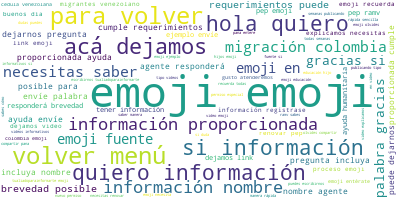

In [46]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster2['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


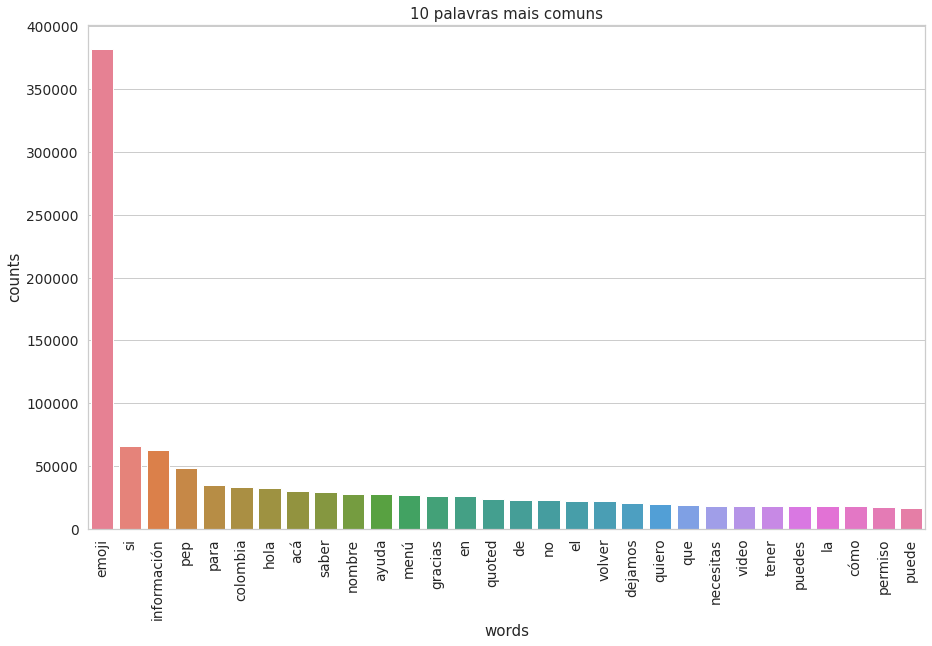

In [47]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster2['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## ***Cluster 3***

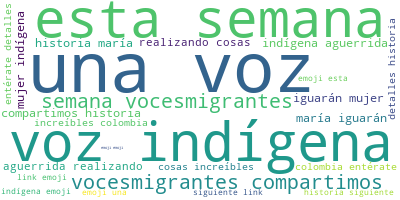

In [48]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster3['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


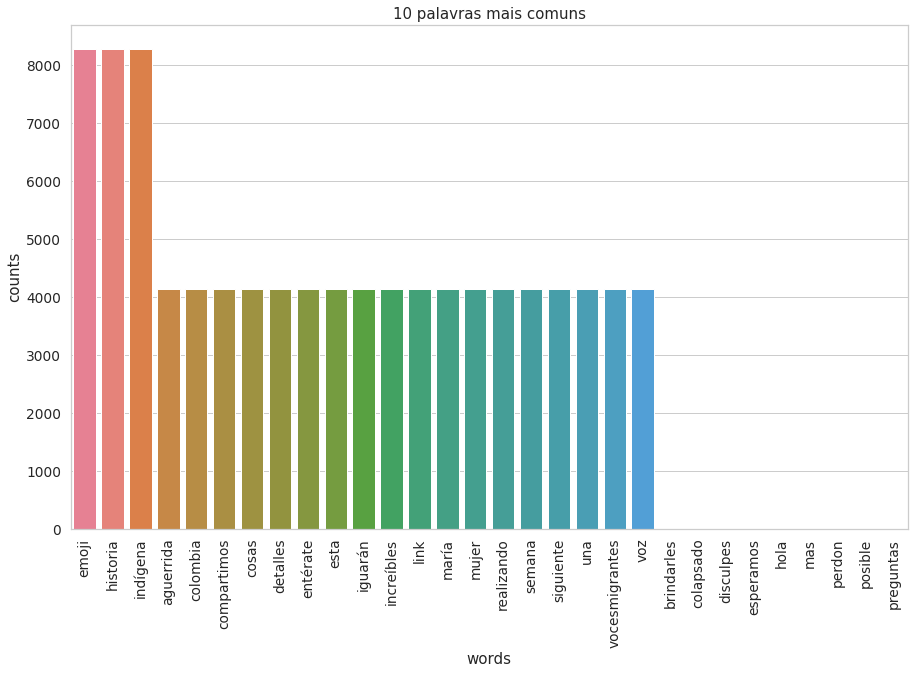

In [49]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster3['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## **Cluster 4**

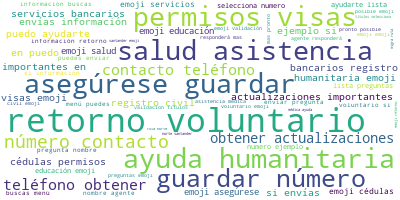

In [50]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster4['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


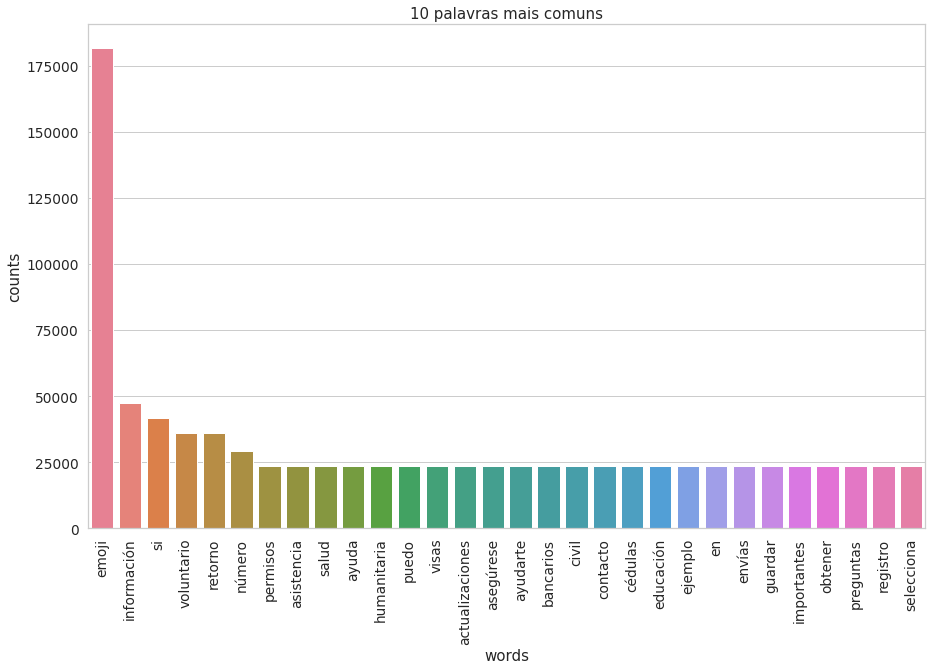

In [51]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster4['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## **Cluster 5**

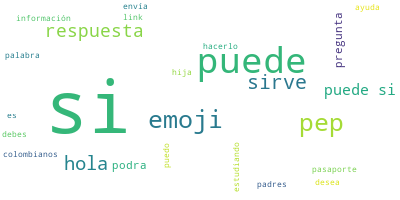

In [52]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster5['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


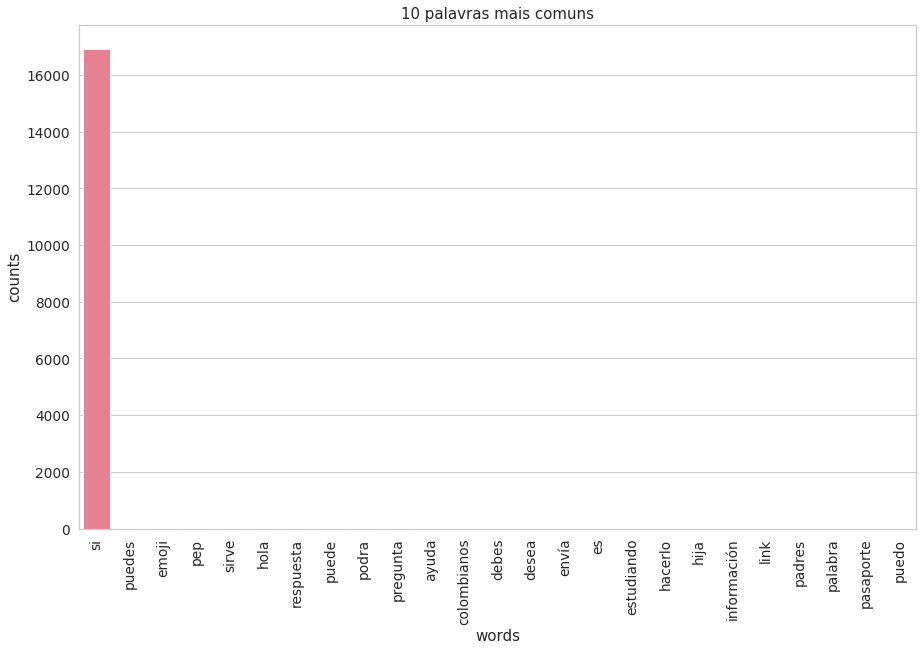

In [53]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster5['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## **Cluster 6**

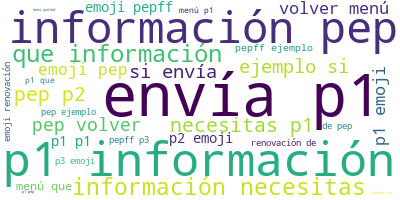

In [54]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster6['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


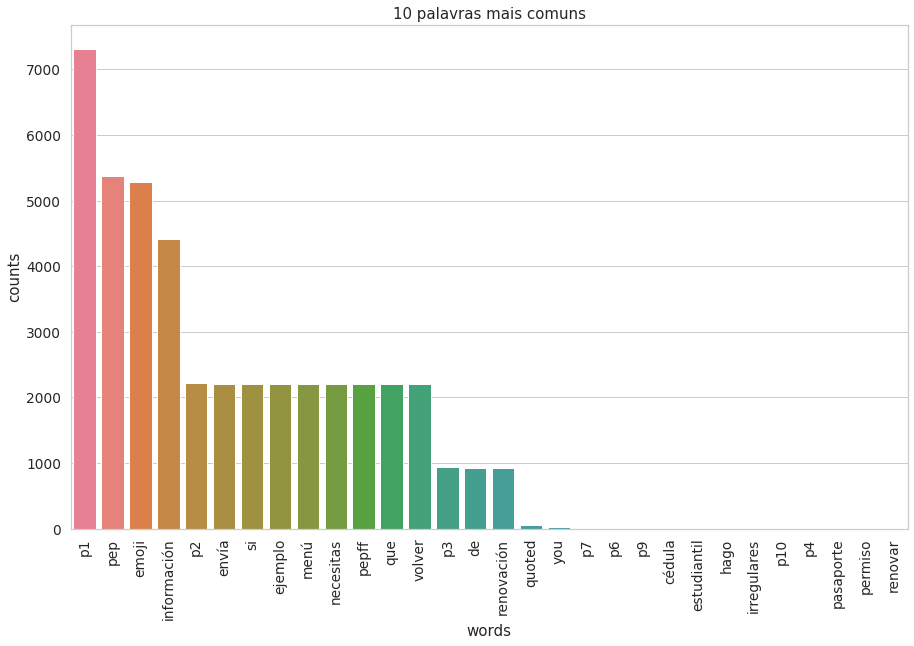

In [55]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster6['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

# **cluster 7**

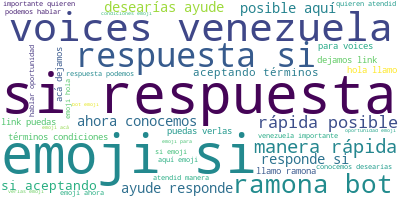

In [56]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster7['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


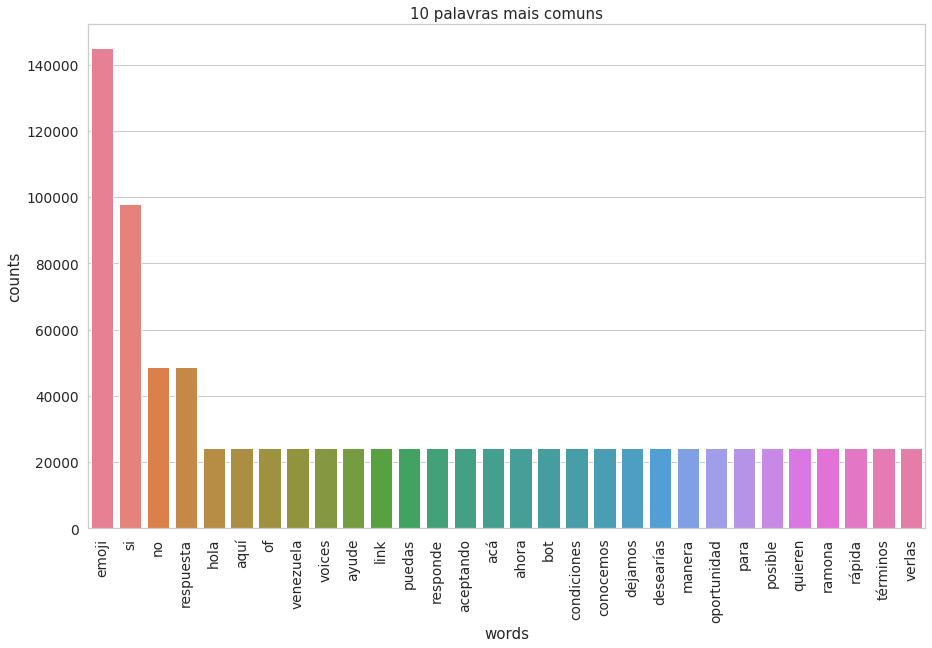

In [57]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster7['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## **Cluster 8 **

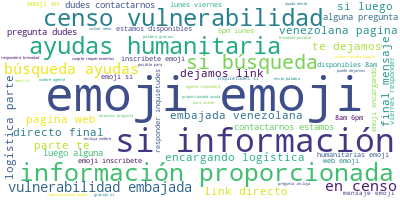

In [58]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster8['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


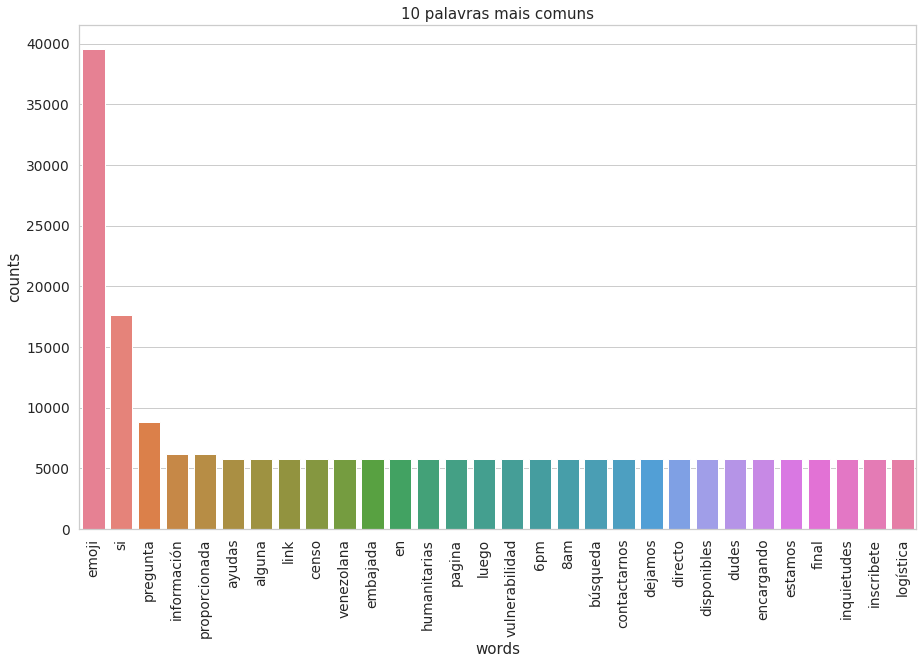

In [59]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster8['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## **Cluster 9**

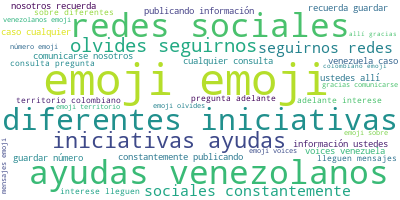

In [60]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster9['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


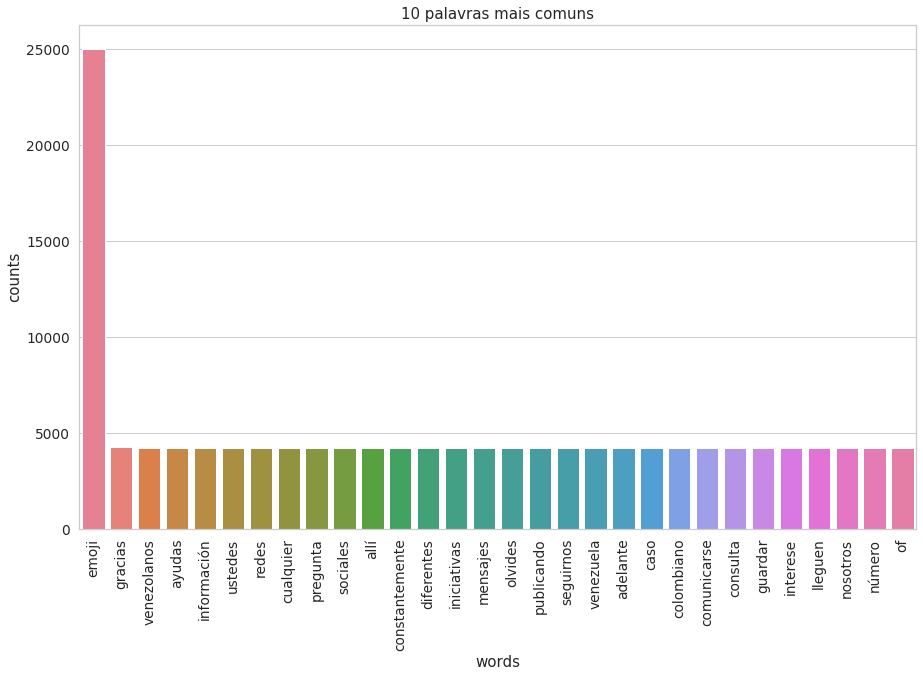

In [61]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster9['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## **Cluster 10**

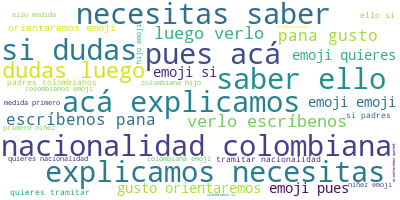

In [62]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster10['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


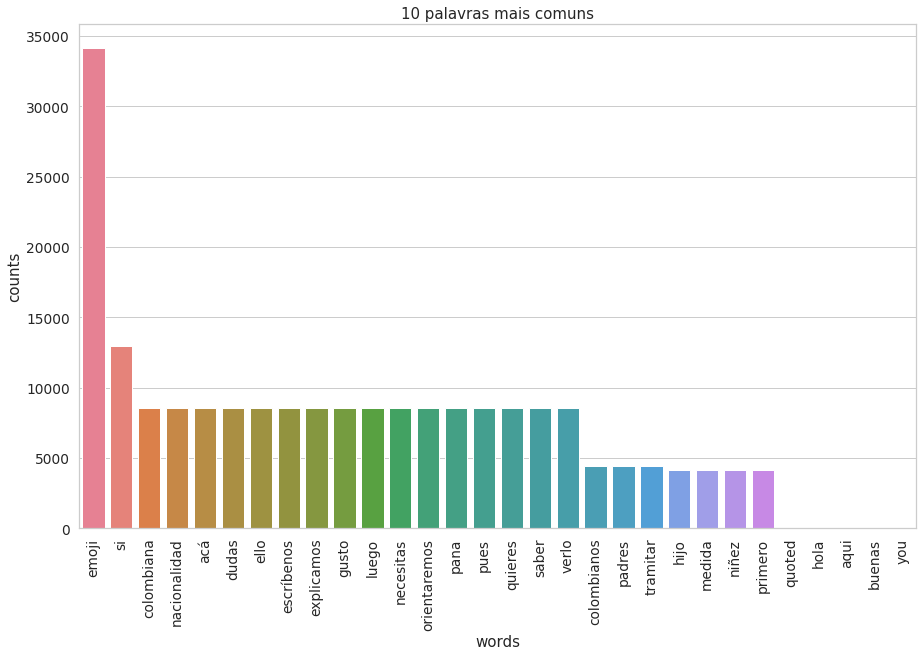

In [63]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster10['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## **Cluster 11**

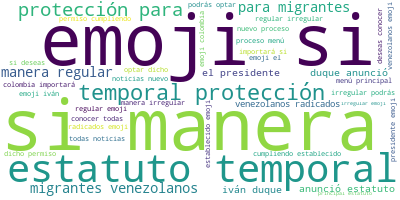

In [64]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster11['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


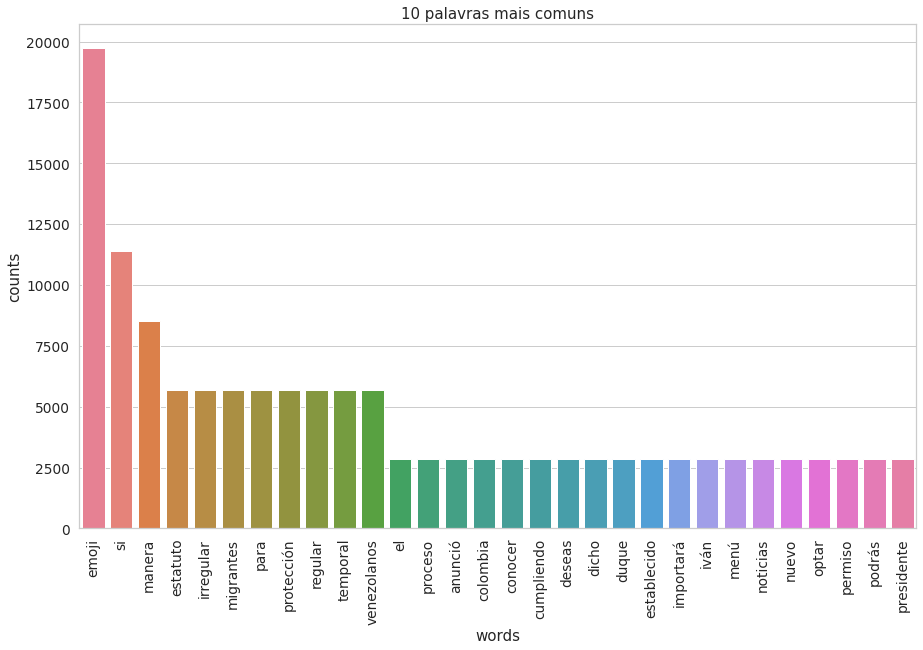

In [65]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster11['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## **Cluster 12**

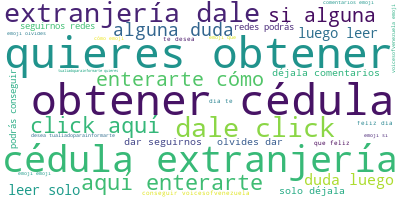

In [66]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster12['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


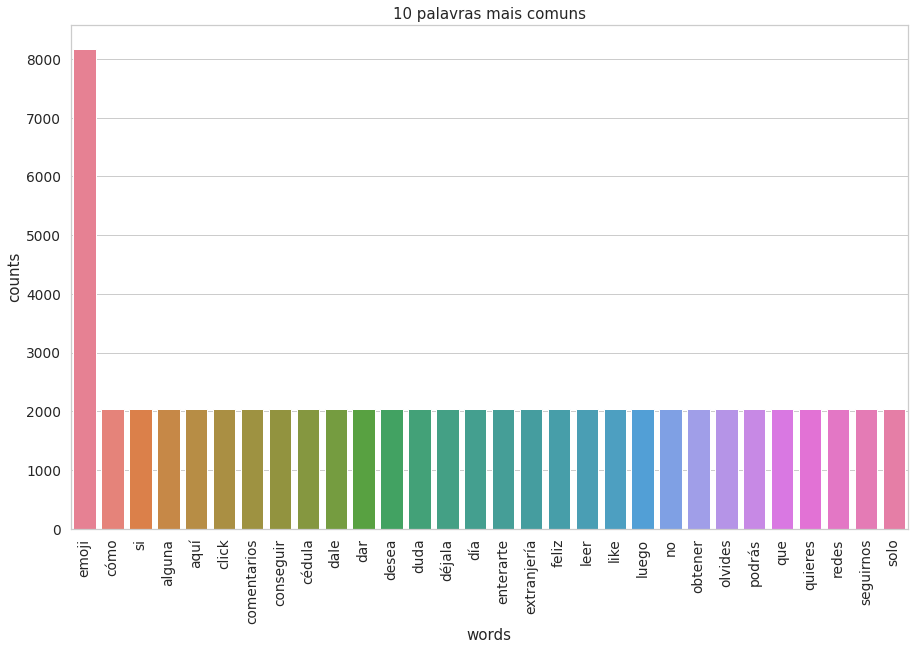

In [67]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster12['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## **Cluster 13**

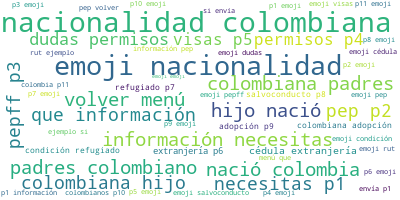

In [68]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster13['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


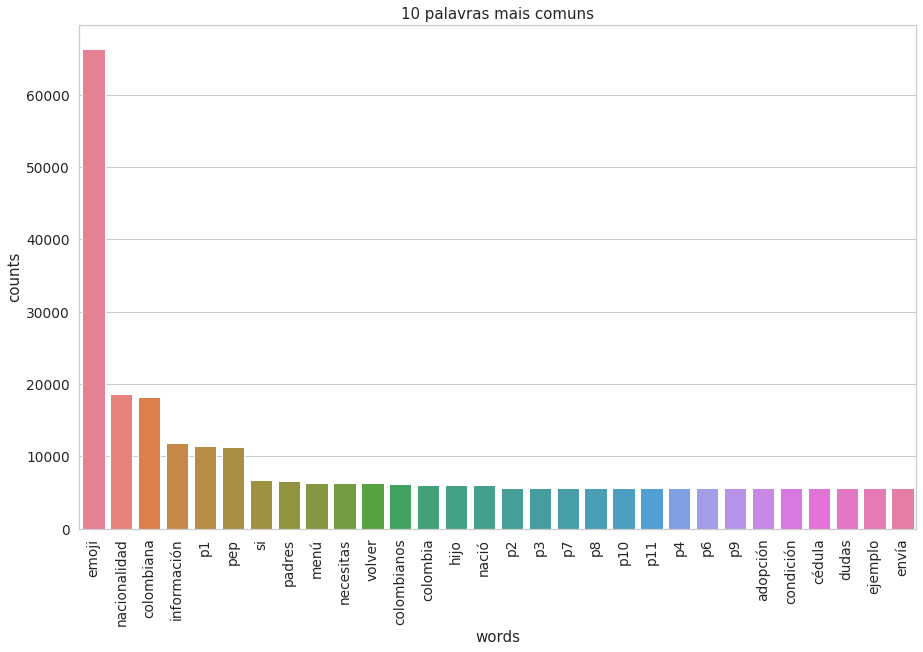

In [69]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stopwords.words('portuguese'))
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(cluster13['impacto_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data2, count_vectorizer)

## **Cluster 14**

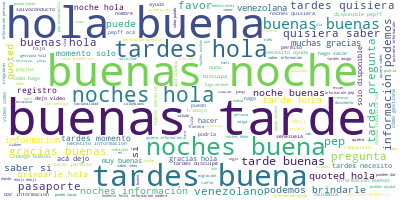

In [70]:
from wordcloud import WordCloud
long_string = ','.join(list(cluster14['impacto_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()